# Линейная алгебра и приложения

## Иерархический кластерный анализ: качественные данные

*Алла Тамбовцева*

### Подготовка к работе

Импортируем знакомые библиотеки и функции:

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

Загрузим результаты [опроса](https://forms.gle/E7B7UbLNSuCmX3Br8) по сказке «Не покидай...», который позволяет выделить популярные архетипы у студентов разных курсов и профилей. Описание архетипичных героев:

* **Король Теодор:** в прошлом кавалерийский полковник, большой любитель лошадей, несильно заинтересован в управлении королевством, почти обо всём советуется с канцлером. Не прочь пошутить, хотя шутки у него не в ладу с дворцовым этикетом.

* **Королева Флора:** жена короля Теодора и сестра покойной королевы Эммы, любит красивые наряды и не очень любит своего мужа, по-своему добрая и чуткая. К шуткам короля относится настороженно.

* **Канцлер Давиль:** фактический правитель Абидонии, любит сочинять суровые законы и пресекать смуту, лично занимается делами, связанными с безопасностью королевства. Страдает от аллергического насморка и от того, что находится в тени короля.

* **Оттилия:** сестра королевы Флоры, жена канцлера Давиля и его секретарь, обожает порядок, предпочитает экстравагантные наряды. Язвительна, любит отпускать колкости в адрес членов королевской семьи.

* **Принцесса Альбина:** дочь короля и королевы, непосредственная, но своенравная девушка, мечтает выйти замуж за принца и уехать подальше от родного замка, в котором ей безумно скучно. Немного избалована и взбалмошна.

* **Патрик:** воспитанник королевы, немой поэт, посвящает стихи принцессе Альбине, страдает от напускной холодности с её стороны. Тайно пишет крамольные песни, которые пользуются особой популярностью у молодёжи.

* **Принц Пенапью:** наследный принц королевства Пенагония, по велению отца сватается к принцессе Альбине, не умеет хитрить и обманывать. Из-за своей наивности кажется смешным, однако умеет различать добро и зло. Любит музыку и театр, но сам талантлив только как зритель.

* **Жак Веснушка:** странствующий артист, хочет вернуться на родину и продолжить дело своего отца-кукольника, умершего в ссылке, но не может из-за принятых в Абидонии законов. Несмотря на сложности, не теряет чувства юмора и всегда готов прийти на помощь.

* **Марта Веснушка:** жена Жака Веснушки и его верная спутница, молодая заботливая женщина с сильным характером, всегда найдёт, что сказать. Повстречав Жака, уехала из своего дома и стала актрисой передвижного театра из двух человек.

* **Марселла:** скромная и исполнительная служанка во дворце короля, старательная и терпеливая, умеет оживлять даже засохшие цветы. Тайно влюблена в Патрика, недолюбливает принцессу из-за того, что она не обращает внимания на чувства поэта.

Данные хранятся в файле Excel, доступном по [ссылке](https://disk.yandex.ru/i/BdIJFXS_yxXOnw):

* первый лист (индекс 0, название `описание`): выбор героев по описанию (как выше);
* второй лист (индекс 1, название `лайки`): лайки и дизлайки образам, проставляемые по кадрам из фильма (понравилось нет, совпало с ожиданием/нет);
* третий лист (индекс 2, название `итоговый выбор`): итоговый выбор героев после знакомства и с описанием, и с кадрами.

Загрузим данные с первого листа (для других листов добавьте аргумент `sheet_name` и впишите туда индекс или название в кавычках):

In [2]:
npk = pd.read_excel("NPK25_share.xlsx")
npk.head()

,опрос,профиль,уровень,пол,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
0,4,политология и управление,бакалавры,жен,0,1,1,0,0,0,0,0,0,0
1,4,политология и управление,бакалавры,жен,0,0,0,0,0,1,0,1,0,0
2,4,политология и управление,бакалавры,жен,0,0,0,0,0,0,0,1,0,0
3,4,политология и управление,бакалавры,жен,0,0,0,1,1,0,0,0,0,0
4,4,политология и управление,бакалавры,муж,0,0,0,0,0,1,1,0,0,0


В столбцах `профиль` и `пол` – хранится профиль и пол студента, в столбце `опрос` – id опроса: 

* 4: ОП «Политология» (год поступления 2022, нынешний 3 курс);
* 8: ОП «Политология» (год поступления 2021, нынешний 4 курс);
* 9: ОП «Политология» (год поступления 2023, нынешний 2 курс);
* 14: ОП «Вычислительные социальные науки» (год поступления 2023, нынешний 2 курс);
* 3, 10 и 13: Бизнес-информатика, Программная инженерия (Пермь);
* остальное – разные слушатели небольших курсов в бакалавриате и магистратуре.

Остальные столбцы – бинарные индикаторы, отражающие выбор или не-выбор героя по текстовому описанию. Чтобы далее было удобно выбирать бинарные столбцы с героями, в частности, после группировки, сохраним названия столбцов с 4 по 14 в список `heroes`:

In [3]:
heroes = npk.columns[4:14]
print(heroes)

Index(['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью', 'Давиль', 'Оттилия',
       'Жак', 'Марта', 'Марселла'],
      dtype='object')


Посмотрим, какие архетипы оказались популярными в «общекомандном зачете» по всем профилям:

In [4]:
# выбираем столбцы с героями, считаем сумму
# сортируем суммы по убыванию

npk[heroes].sum().sort_values(ascending = False)

Патрик      81
Жак         76
Давиль      70
Марта       69
Оттилия     63
Пенапью     45
Альбина     41
Марселла    28
Флора       24
Теодор      22
dtype: int64

Невероятно, но факт: если рассматривать не только политологов, канцлер все-таки уходит на третье место, волшебная сила искусства побеждает :) Сгруппируем строки по профилям:

In [5]:
npk.groupby("профиль")[heroes].sum()

,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
профиль,,,,,,,,,,
другое,2,5,4,7,6,4,7,10,7,9
математика и информатика,9,6,14,14,11,15,19,24,20,7
политология и управление,8,12,19,50,21,44,28,32,32,8
социальные науки,3,1,4,10,7,7,9,10,10,4


Ладно-ладно, канцлер и у политологов на втором месте, а не на первом. Посмотрим на предпочтения респондентов с разбивкой по полу:

In [6]:
npk.groupby("пол")[heroes].sum()

,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
пол,,,,,,,,,,
жен,8,23,25,38,21,22,48,35,48,18
муж,14,1,16,43,24,48,15,41,21,10


Отличительная особенность: если смотреть на тематически близких героев, находящихся в связке *муж-жена*, девушки склонны выбирать персонажа женского пола (Флора, Оттилия, Марта), а юноши – персонажа мужского пола (Теодор, Давиль, Жак).

Приступим к кластеризации студентов по их предпочтениям героев. Все показатели в бинарной шкале, нормировать их не нужно.

### Иерархический кластерный анализ

Так как переменные бинарные, для них логичнее всего использовать блочное (манхэттенское) расстояние. Попробуем задействовать его в паре с методом ближнего соседа:

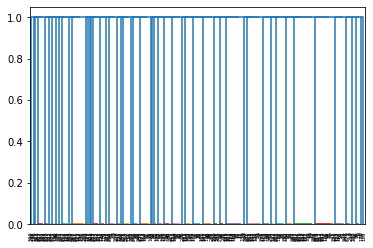

In [7]:
# выбираем столбцы из heroes и кластеризуем
# по умолчанию method = "single"

hc = linkage(npk[heroes], metric = "cityblock")
dendrogram(hc);

Как мы уже убеждались ранее, метод проблемный, для бинарных данных (по крайней мере, когда бинарных столбцов немало) совсем губительный. Пойдем по старой схеме: изменим его на метод дальнего соседа

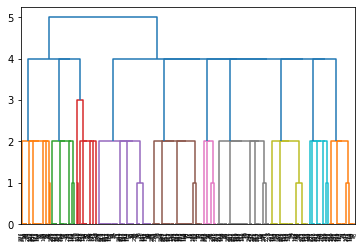

In [8]:
hc = linkage(npk[heroes], metric = "cityblock", method = "complete")
dendrogram(hc);

Явно лучше. Однако если присмотреться к цветовой разметке, заметим, что предлагаемое число кластеров равно 10, что совпадает с количеством героев. И без кластерного анализа можно догадаться, что респондентов можно поделить на 10 групп – предпочитающих каждый из 10 архетипов. Если сформируем более крупные группы, их будет всего 2, маловато. 

Выберем метод средней связи в качестве способа агрегирования:

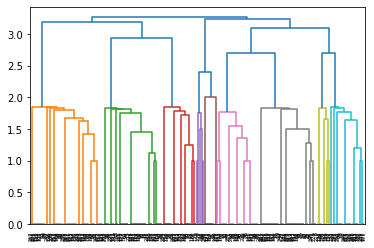

In [9]:
hc = linkage(npk[heroes], metric = "cityblock", method = "average")
dendrogram(hc);

А вот тут уже вполне информативно. Давайте выберем три группы:

In [10]:
clusters_= cut_tree(hc, n_clusters = 3).reshape(-1, )
print(clusters_)

[0 1 2 2 1 2 2 2 1 2 2 1 1 2 1 1 2 1 1 2 1 2 2 1 1 1 1 2 1 2 2 1 2 1 1 1 2
 1 2 1 1 2 2 1 2 1 2 1 2 2 2 1 1 1 1 1 2 2 2 2 1 2 2 1 1 1 0 1 1 2 2 2 2 0
 2 0 2 1 1 2 1 1 2 2 1 0 2 2 2 1 1 0 2 1 2 1 2 0 1 2 2 2 1 1 1 1 0 1 1 2 1
 2 2 1 1 2 1 0 1 1 2 2 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2
 2 1 2 2 2 1 1 1 1 1 1 2 1 0 1 0 1 1 1 1 1 2 1 2 0 2 2 1 2 1 1 1 2 1 1 1 1
 2 1 2 1 2 0 0 2 2 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 1 2 1 2 1 2 2 1 1 2 2 1 2
 1 1 2 1 2 1 2 2 1 2 1 1 2 1 0 1 1 0 2 2 2 2 1 2 0 1 1 2 1 1 1 1 1 1 2 1 1
 2 2 2 2 1 2 2 1 2 1 1 1 2 2 1 1 2 2 2]


Добавим столбец с метками кластеров в исходный датафрейм и поймем, что за кластеры мы получили:

In [11]:
npk["cluster"] = clusters_

Сгруппируем респондентов по полученным кластерам и посчитаем суммы по бинарным столбцам, соответствующим героям:

In [12]:
npk.groupby("cluster")[heroes].sum()

,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
cluster,,,,,,,,,,
0,0,6,3,11,0,0,0,0,0,14
1,7,6,33,34,11,70,61,21,12,4
2,15,12,5,36,34,0,2,55,57,10


Итак:

* Кластер 0: «романтические натуры», в топ-2 входят Марселла и Патрик с их интригующей романтической линией.
* Кластер 1: «властолюбивые натуры», с существенным отрывом на первом месте стоит канцлер, на втором – его жена.
* Кластер 2: «творческие натуры» с существенным отрывом в топ-2 входят странствующие артисты Жак и Марта.

Кластеризация получилась вполне логичной. Можем проверить, можно ли объяснить деление на кластеры зависимостью от профиля или пола студента. Для удобства отфильтруем строки для каждой группы в отдельные датафреймы:

In [13]:
one = npk[npk["cluster"] == 0]
two = npk[npk["cluster"] == 1]
three = npk[npk["cluster"] == 2]

Посмотрим на доли студентов разных профилей в каждом кластере:

In [14]:
print(one["профиль"].value_counts(normalize = True)) # кластер 0
print(two["профиль"].value_counts(normalize = True)) # кластер 1
print(three["профиль"].value_counts(normalize = True)) # кластер 2

политология и управление    0.470588
другое                      0.235294
социальные науки            0.176471
математика и информатика    0.117647
Name: профиль, dtype: float64
политология и управление    0.514493
математика и информатика    0.282609
социальные науки            0.108696
другое                      0.094203
Name: профиль, dtype: float64
политология и управление    0.463415
математика и информатика    0.276423
социальные науки            0.130081
другое                      0.130081
Name: профиль, dtype: float64


Никаких интересных различий по составу кластеров не наблюдается (политологов, в целом, больше в данных), можно только отметить, что в первом кластере «романтиков» больше студентов гуманитарных профилей (`другое`), а вот во втором кластере любителей власти их меньше всех. Посмотрим на распределение по полу:

In [15]:
print(one["пол"].value_counts(normalize = True)) # кластер 0
print(two["пол"].value_counts(normalize = True)) # кластер 1
print(three["пол"].value_counts(normalize = True)) # кластер 2

жен    0.705882
муж    0.294118
Name: пол, dtype: float64
жен    0.528986
муж    0.471014
Name: пол, dtype: float64
жен    0.552846
муж    0.447154
Name: пол, dtype: float64


Опять же, так как респондентов-девушек, в целом, больше, неудивительно, что их больше всего в каждом кластере. Здесь разумно смотреть на соотношение долей между собой. В первом кластере число девушек более, чем в два раза превышает число юношей (девушки-романтики), в остальных кластерах соотношение примерно 50 на 50. 

Нельзя сказать, что предпочтения архетипов явно связаны с профилем или полом. Изначально мы могли это проверить без кластерного анализа, построив таблицы сопряженности *профиль vs герои* (таблица 4 на 10) и *пол vs герои* (таблица 2 на 10) и применив критерий согласия хи-квадрат. Однако при таком большом количестве ячеек в таблицах и не очень большом объеме выборки мы, скорее всего, будем получать значительный процент маленьких частот, что будет негативно сказываться на качестве проверки гипотезы о независимости признаков. Плюс, построение таких таблиц осложняется тем, что выбрать можно было более одного героя. Поэтому категории в любом случае придется укрупнять – например, объединять выбор героев, близких тематически. А с помощью кластерного анализа мы как раз это и проделали – вместо 10 категорий получили 3 группы.

Убедимся, что связи между профилем и делением на кластеры по предпочитаемым архетипам нет:

In [16]:
from scipy import stats

# crosstab – таблица сопряженности
# chi2_contingency – критерий хи-квадрат

tab = pd.crosstab(npk["профиль"], npk["cluster"])
print(tab)
print(stats.chi2_contingency(tab))

cluster                   0   1   2
профиль                            
другое                    4  13  16
математика и информатика  2  39  34
политология и управление  8  71  57
социальные науки          3  15  16
(5.378717625161262, 0.49623478539433585, 6, array([[ 2.01798561, 16.38129496, 14.60071942],
       [ 4.58633094, 37.23021583, 33.18345324],
       [ 8.31654676, 67.51079137, 60.17266187],
       [ 2.07913669, 16.87769784, 15.04316547]]))


На втором месте в результате выше – p-value для проверки гипотезы о независимости признаков. P-value =  0.496 большое, гипотеза не отвергается, связи нет.

Проделаем то же для пола:

In [17]:
tab2 = pd.crosstab(npk["пол"], npk["cluster"])
print(tab2)
print(stats.chi2_contingency(tab2))

cluster   0   1   2
пол                
жен      12  73  68
муж       5  65  55
(1.9194324069011717, 0.3830015650755944, 2, array([[ 9.35611511, 75.94964029, 67.6942446 ],
       [ 7.64388489, 62.05035971, 55.3057554 ]]))


Та же история, p-value = 0.383 большое, гипотеза не отвергается, связи нет.